# PISA Data Exploration
### by Andreja Ho



## Table of Contents
- [Introduction](#intro)
- [Preliminary Wrangling](#wrangling)
- [Univariate Exploration](#univariate)
- [Bivariate Exploration](#bivariate)
- [Multivariate Exploration](#multivariate)
- [Conclusion](#conclusion)

<a id='intro'></a>
## Introduction

This document explores a dataset containing PISA's 2012 data. PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school. Around 510,000 students in 65 economies globally took part in the PISA 2012 assessment of reading, mathematics, and science representing about 28 million 15-year-olds globally. Additionally, this dataset contains several other information about students that took test. Some of these features are wealth and home possessions, cultural possessions at home, educational level of the parents, math anxiety, sense of belongings, mother and father present, just to name a few.<br>

For the purpose of this analysis, I will focus on only a few variables and explore the dataset through univariate, bivariate, and multivariate visualization. All details of preliminary data wrangling, feature engineering, and specific visualizations are described in the chapters below.


<a id='wrangling'></a>
## Preliminary Wrangling

PISA 2012 dataset is very complex and the original dataset contains 485490 rows and 636 columns. For this analysis, I’ve chosen only a few columns of interest. To understand the variables (column headers), I used PISA’s data dictionary[link] and [PISA’s codebook](https://www.oecd.org/pisa/pisaproducts/PISA-2012-technical-report-final.pdf). Both documents were necessary to choose variables of interest and how to properly interpret them. 

First, I looked through the dictionary to learn what data was gathered and define the idea of the interest. Next, I read through the codebook to decide what features or variables are best suited for the analysis.<br>
 
I am interested in how specific features impact students’ performance on math, reading, and science testing. The features of interests are:<br>
   - wealth<br> 
   - cultural and home possessions<br>
   - educational resources<br>
   - parents’ and siblings’ presence<br>
   - the educational level of parents<br>
   - skip classes within school day<br>
   - skip whole school day<br>
   
Besides those features, I will be analyzing if there is any difference between<br>
   - gender<br>
   - schools that joined OECD<br>
   - country<br><br>

In [1]:
# Import dependencies
import numpy as np
import pandas as pd

In [ ]:
#Import dependencies for vizuals
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()

In [114]:
# # Read in original dataset and explore what features are most suitable for the analysis
# # THIS LINE OF CODE ID SWITCHED OFF FOR FASTER LOADING.
# df_origin = pd.read_csv('pisa2012.csv',sep=',', encoding='latin-1',error_bad_lines=False, index_col=False, dtype='unicode')
# pd.set_option('display.max_columns', None)
# df_origin.head(3)

In [60]:
# Dataset shape
# df_origin.shape

(485490, 636)

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.
Here describe the whole dataset and steps what did you do to get a clean dataset.

## Import only columns of interest

When I choose the columns of interest I used Excel `textjoin()` function in order to get all columns’ names in a list, separated with a comma and quotation marks. There were some issues with reading large csv file into pandas dataframe. Thus I used the following code: issues with readind the large csv: `pd.read_csv('pisa2012.csv',sep=',', encoding='latin-1',error_bad_lines=False, index_col=False, dtype='unicode')`


In [113]:
# List the columns of interest and read in csv file
col_list = ['CNT','OECD','SCHOOLID','ST04Q01','ST09Q01','ST115Q01','ST11Q01','ST11Q02','ST11Q03','ST11Q04','ANXMAT','CULTPOS','FISCED','HEDRES','HOMEPOS','MISCED','WEALTH','ANCBELONG','PV1MATH','PV1READ','PV1SCIE']
df_short = pd.read_csv('pisa2012.csv',sep=',', encoding='latin-1',error_bad_lines=False, index_col=False, dtype='unicode', usecols=col_list)

In [3]:
# Display all columns for better view and display first five columns
pd.set_option('display.max_columns', None)
df_short.head(5)

,CNT,OECD,SCHOOLID,ST04Q01,ST09Q01,ST115Q01,ST11Q01,ST11Q02,ST11Q03,ST11Q04,ANXMAT,CULTPOS,FISCED,HEDRES,HOMEPOS,MISCED,WEALTH,ANCBELONG,PV1MATH,PV1READ,PV1SCIE
0,Albania,Non-OECD,0000001,Female,None,1,Yes,Yes,Yes,Yes,0.32,-0.48,"ISCED 3A, ISCED 4",-1.29,-2.61,"ISCED 3A, ISCED 4",-2.92,-0.7351,406.8469,249.5762,341.7009
1,Albania,Non-OECD,0000001,Female,None,1,Yes,Yes,NaN,Yes,NaN,1.27,"ISCED 3A, ISCED 4",1.12,1.41,"ISCED 5A, 6",0.69,NaN,486.1427,406.2936,548.9929
2,Albania,Non-OECD,0000001,Female,None,1,Yes,Yes,No,Yes,NaN,1.27,"ISCED 5A, 6",-0.69,0.14,"ISCED 5A, 6",-0.23,NaN,533.2684,401.21,499.6643
3,Albania,Non-OECD,0000001,Female,None,1,Yes,Yes,No,Yes,0.31,1.27,"ISCED 5A, 6",0.04,-0.73,"ISCED 3B, C",-1.17,NaN,412.2215,547.363,438.6796
4,Albania,Non-OECD,0000001,Female,None,2,Yes,Yes,Yes,NaN,1.02,1.27,"ISCED 3A, ISCED 4",-0.69,-0.57,None,-1.17,0.8675,381.9209,311.7707,361.5628


<a id='clean'></a>
## Clean

In [4]:
# Create a copy of original data sets
df = df_short.copy()

In [5]:
# Check the shape
df.shape

(485490, 21)

In [6]:
# Rename colum names for better understanding
# Columns were renamed with help of excel with `textjoin` and `concatenate` function
df.rename(columns={'CNT':'Country_code', 'OECD':'OECD_country', 'SCHOOLID':'School_ID', 'ST04Q01':'Gender', 'ST09Q01':'Truancy_Skip_whole_school_day', 'ST115Q01':'Truancy_Skip_classes_within_school_day', 'ST11Q01':'At_Home_Mother', 'ST11Q02':'At_Home_Father', 'ST11Q03':'At_Home_Brothers', 'ST11Q04':'At_Home_Sisters', 'ANXMAT':'Mathematics_Anxiety', 'CULTPOS':'Cultural_Possessions', 'FISCED':'Educational_level_of_father_ISCED', 'HEDRES':'Home_educational_resources', 'HOMEPOS':'Home_Possessions', 'MISCED':'Educational_level_of_mother_ISCED', 'WEALTH':'Wealth', 'ANCBELONG':'Sense_of_Belonging_to_School_Anchored', 'PV1MATH':'Plausible_value_mathematics', 'PV1READ':'Plausible_value_reading', 'PV1SCIE':'Plausible_value_science'}, inplace=True)

In [7]:
# Check renamed columns
df.head(3)

,Country_code,OECD_country,School_ID,Gender,Truancy_Skip_whole_school_day,Truancy_Skip_classes_within_school_day,At_Home_Mother,At_Home_Father,At_Home_Brothers,At_Home_Sisters,Mathematics_Anxiety,Cultural_Possessions,Educational_level_of_father_ISCED,Home_educational_resources,Home_Possessions,Educational_level_of_mother_ISCED,Wealth,Sense_of_Belonging_to_School_Anchored,Plausible_value_mathematics,Plausible_value_reading,Plausible_value_science
0,Albania,Non-OECD,0000001,Female,None,1,Yes,Yes,Yes,Yes,0.32,-0.48,"ISCED 3A, ISCED 4",-1.29,-2.61,"ISCED 3A, ISCED 4",-2.92,-0.7351,406.8469,249.5762,341.7009
1,Albania,Non-OECD,0000001,Female,None,1,Yes,Yes,NaN,Yes,NaN,1.27,"ISCED 3A, ISCED 4",1.12,1.41,"ISCED 5A, 6",0.69,NaN,486.1427,406.2936,548.9929
2,Albania,Non-OECD,0000001,Female,None,1,Yes,Yes,No,Yes,NaN,1.27,"ISCED 5A, 6",-0.69,0.14,"ISCED 5A, 6",-0.23,NaN,533.2684,401.21,499.6643


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 21 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   Country_code                            485490 non-null  object
 1   OECD_country                            485490 non-null  object
 2   School_ID                               485490 non-null  object
 3   Gender                                  485490 non-null  object
 4   Truancy_Skip_whole_school_day           479131 non-null  object
 5   Truancy_Skip_classes_within_school_day  479269 non-null  object
 6   At_Home_Mother                          460559 non-null  object
 7   At_Home_Father                          441036 non-null  object
 8   At_Home_Brothers                        400076 non-null  object
 9   At_Home_Sisters                         390768 non-null  object
 10  Mathematics_Anxiety                     314764 non-null 

Based on this [wikipedia](https://en.wikipedia.org/wiki/International_Standard_Classification_of_Education) site I have changed educational level of for better understanding:

| Pisa 2012 | From Wikipedia - ISCED 2011 | encoding used in this dataset
| :- | :- | :- |
|ISCED 1           | Primary education | ISCED 1
|ISCED 2           | Lower secondary education|  ISCED 2
|ISCED 3B, C       | Upper secondary education  | ISCED 3
|ISCED 3A, ISCED 4 | Post-secondary non-tertiary education   | ISCED 4
|ISCED 5B          | Short-cycle tertiary education | ISCED 5
|ISCED 5A, 6       | Bachelor's or equivalent  | ISCED 6
|None| None| None

In [9]:
# Rename education level - father
df.Educational_level_of_father_ISCED.value_counts()

ISCED 3A, ISCED 4    118890
ISCED 5A, 6          113406
ISCED 2               66728
ISCED 5B              61617
ISCED 3B, C           39789
ISCED 1               35938
None                  16535
Name: Educational_level_of_father_ISCED, dtype: int64

In [10]:
# Rename education level - mother
df.Educational_level_of_mother_ISCED.value_counts()

ISCED 3A, ISCED 4    126768
ISCED 5A, 6          114452
ISCED 5B              68219
ISCED 2               66650
ISCED 1               36556
ISCED 3B, C           35672
None                  18768
Name: Educational_level_of_mother_ISCED, dtype: int64

In [11]:
# Rename Truancy_Skip_whole_school_day
df.Truancy_Skip_whole_school_day.value_counts()

None                     385998
One or two times          75969
Three or four times       10882
Five or more times         6282
Name: Truancy_Skip_whole_school_day, dtype: int64

In [12]:
# Replace educational values with with easy understand values (see comments for explanation)
df["Educational_level_of_father_ISCED"] \
.replace({"ISCED 1": "ISCED 1",
          "ISCED 2": "ISCED 2",
          "ISCED 3B, C" : "ISCED 3",
          "ISCED 3A, ISCED 4": "ISCED 4",
          "ISCED 5B": "ISCED 5",
          "ISCED 5A, 6" :"ISCED 6",
         "None" : "None"}, inplace=True)

In [13]:
# Replace educational values with easy understand values (see comments for explanation)
df["Educational_level_of_mother_ISCED"] \
.replace({"ISCED 1": "ISCED 1",
          "ISCED 2": "ISCED 2",
          "ISCED 3B, C" : "ISCED 3",
          "ISCED 3A, ISCED 4": "ISCED 4",
          "ISCED 5B": "ISCED 5",
          "ISCED 5A, 6" :"ISCED 6",
         "None" : "None"}, inplace=True)

In [14]:
# Replace Truancy_Skip_whole_school_day values with with easy understand values
df["Truancy_Skip_whole_school_day"] \
.replace({"Five or more times": "5+ times",
          "Three or four times": "3-4 times",
          "One or two times" : "1-2 times",
          "None": "0 times"}, inplace=True)

*Issue with concerting "Truancy_Skip_whole_school_day" column to categorical datatype. Same code was used but unable to convert. Note: Pay attention when making visualizations in case of errors.*

In [16]:
# Check for correct transformation - function didn't work!
df.Truancy_Skip_whole_school_day.value_counts()

None                     385998
One or two times          75969
Three or four times       10882
Five or more times         6282
Name: Truancy_Skip_whole_school_day, dtype: int64

In [17]:
#pd.set_option('display.max_rows', None) - THIS LINE OF CODE WAS SWITCHED OFF FOR SHORTER DISPLAY
# Assess the county columns to perform necessary cleaning
df.Country_code.value_counts().sort_index(ascending=False)

Vietnam                      4959
Uruguay                      5315
United States of America     4978
United Kingdom              12659
United Arab Emirates        11500
Turkey                       4848
Tunisia                      4407
Thailand                     6606
Switzerland                 11229
Sweden                       4736
Spain                       25313
Slovenia                     5911
Slovak Republic              4678
Singapore                    5546
Serbia                       4684
Russian Federation           5231
Romania                      5074
Qatar                       10966
Portugal                     5722
Poland                       4607
Peru                         6035
Perm(Russian Federation)     1761
Norway                       4686
New Zealand                  4291
Netherlands                  4460
Montenegro                   4744
Mexico                      33806
Massachusetts (USA)          1723
Malaysia                     5197
Macao-China   

In [18]:
# Combine names that have been broken down by states or cities with one unique name of the country
df = df.replace(['Connecticut (USA)', 'Florida (USA)', 'Massachusetts (USA)', 'United States of America'], 'USA')
df = df.replace(['Chinese Taipei'], 'Taiwan')
df = df.replace(['China-Shanghai', 'Hong Kong-China', 'Macao-China'], 'China')
df = df.replace(['Russian Federation', 'Perm(Russian Federation)'], 'Russia')

In [19]:
# Check for the right transformation
#df.Country_code.value_counts().sort_index(ascending=False)

<a id='datatypes'></a>
## Datatypes
It is important to change datatypes into appropriate datatypes for several reasons
- faster performance
- lower usage of the memory
- efficient computation with appropriate variables

In [20]:
# Check datatype and other properties
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 21 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   Country_code                            485490 non-null  object
 1   OECD_country                            485490 non-null  object
 2   School_ID                               485490 non-null  object
 3   Gender                                  485490 non-null  object
 4   Truancy_Skip_whole_school_day           479131 non-null  object
 5   Truancy_Skip_classes_within_school_day  479269 non-null  object
 6   At_Home_Mother                          460559 non-null  object
 7   At_Home_Father                          441036 non-null  object
 8   At_Home_Brothers                        400076 non-null  object
 9   At_Home_Sisters                         390768 non-null  object
 10  Mathematics_Anxiety                     314764 non-null 

In [21]:
# Check for null values
df.isnull().sum()

Country_code                                   0
OECD_country                                   0
School_ID                                      0
Gender                                         0
Truancy_Skip_whole_school_day               6359
Truancy_Skip_classes_within_school_day      6221
At_Home_Mother                             24931
At_Home_Father                             44454
At_Home_Brothers                           85414
At_Home_Sisters                            94722
Mathematics_Anxiety                       170726
Cultural_Possessions                       14133
Educational_level_of_father_ISCED          32587
Home_educational_resources                  7718
Home_Possessions                            5683
Educational_level_of_mother_ISCED          18405
Wealth                                      5893
Sense_of_Belonging_to_School_Anchored     177850
Plausible_value_mathematics                    0
Plausible_value_reading                        0
Plausible_value_scie

*Sense_of_Belonging_to_School_Anchored (177850) and  Mathematics_Anxiety (170726) has too many null values. For the this analysis purposes I have to drop null values (one of the reasons is to change datatype). For this reason I won't include these two features into my analysis.*

In [22]:
# Drop columns Sense_of_Belonging_to_School_Anchored and Mathematics_Anxiety
df.drop(['Sense_of_Belonging_to_School_Anchored', 'Mathematics_Anxiety'], axis=1, inplace=True)

In [23]:
# Drop null values
df.dropna(inplace=True)

In [24]:
# Check data shape
df.shape

(325497, 19)

In [25]:
# Change Educational_level_of_father_ISCED to categort datatype
educational_classes = ['None', 'ISCED 1', 'ISCED 2', 'ISCED 3', 'ISCED 4', 'ISCED 5', 'ISCED 6']
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = educational_classes)
df['Educational_level_of_father_ISCED'] = df['Educational_level_of_father_ISCED'].astype(vclasses)

In [26]:
# Change Educational_level_of_father_ISCED to categort datatype
educational_classes = ['None','ISCED 1', 'ISCED 2', 'ISCED 3', 'ISCED 4', 'ISCED 5', 'ISCED 6']
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = educational_classes)
df['Educational_level_of_mother_ISCED'] = df['Educational_level_of_mother_ISCED'].astype(vclasses)

In [27]:
#df.Truancy_Skip_whole_school_day.value_counts()

In [28]:
# # Change Truancy_Skip_whole_school_day to categort datatype
# skip_school_day = ['None', '1-2 times', '3-4 times', '5+ times']
# categorical_variable = pd.api.types.CategoricalDtype(ordered = True, categories = skip_school_day)
# df['Truancy_Skip_whole_school_day'] = df['Truancy_Skip_whole_school_day'].astype(categorical_variable)

In [29]:
#df.Truancy_Skip_whole_school_day.value_counts()

*Issue with concerting "Truancy_Skip_whole_school_day" column to categorical datatype. Same code was used but unable to convert. Note: Pay attention when making visualizations in case of errors.*

In [30]:
# Change OECD_country to boolean
oecd_country = {'OECD': True, 'Non-OECD': False}
df["OECD_country"].replace(oecd_country, inplace=True)

In [31]:
# Chenge mother, father, brothers, sisters at home to boolean
home = {'Yes': True, 'No': False}
df["At_Home_Mother"].replace(home, inplace=True)
df["At_Home_Father"].replace(home, inplace=True)
df["At_Home_Brothers"].replace(home, inplace=True)
df["At_Home_Sisters"].replace(home, inplace=True)

In [32]:
# using dictionary to convert specific columns
convert_dict = {'Truancy_Skip_classes_within_school_day': int,
                'Cultural_Possessions' : float,
                'Home_educational_resources': float,
                'Home_Possessions': float,
                'Wealth': float,
                'Plausible_value_mathematics' : float,
                'Plausible_value_reading': float,
                'Plausible_value_science' : float,      
               }
  df = df.astype(convert_dict)

In [127]:
# Check for datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325497 entries, 0 to 485489
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   Country_code                            325497 non-null  object  
 1   OECD_country                            325497 non-null  bool    
 2   School_ID                               325497 non-null  object  
 3   Gender                                  325497 non-null  object  
 4   Truancy_Skip_whole_school_day           325497 non-null  object  
 5   Truancy_Skip_classes_within_school_day  325497 non-null  int32   
 6   At_Home_Mother                          325497 non-null  bool    
 7   At_Home_Father                          325497 non-null  bool    
 8   At_Home_Brothers                        325497 non-null  bool    
 9   At_Home_Sisters                         325497 non-null  bool    
 10  Cultural_Possessions            

## Additional feature engineering and data manipulation

In [124]:
# Create overall score
df['Overall_score'] = ((df.Plausible_value_mathematics + df.Plausible_value_reading + df.Plausible_value_science) / 3)

In [118]:
# Create single parent column
df['Single_parent'] = np.where((df['At_Home_Mother'] == True) & (df['At_Home_Father'] == True), False, True)

In [122]:
# Create single child column
df['Single_child'] = np.where((df['At_Home_Brothers'] == False) & (df['At_Home_Sisters'] == False), True, False)

In [126]:
# Check dataframe for accuraccy
df.sample(5)

,Country_code,OECD_country,School_ID,Gender,Truancy_Skip_whole_school_day,Truancy_Skip_classes_within_school_day,At_Home_Mother,At_Home_Father,At_Home_Brothers,At_Home_Sisters,Cultural_Possessions,Educational_level_of_father_ISCED,Home_educational_resources,Home_Possessions,Educational_level_of_mother_ISCED,Wealth,Plausible_value_mathematics,Plausible_value_reading,Plausible_value_science,Cultural_Possessions_bin,single_parent,single_child,overall_score
139107,Denmark,True,0000050,Female,None,1,True,True,True,True,-0.48,ISCED 3,0.04,-0.21,ISCED 5,-0.35,560.9207,522.2628,519.1533,Low,False,False,534.112267
86025,Canada,True,0000474,Female,One or two times,1,True,False,False,True,1.27,ISCED 4,1.12,-0.04,ISCED 6,-0.61,529.0622,584.7751,572.1186,High,True,False,561.985300
56800,Brazil,False,0000074,Male,None,2,True,False,True,True,-1.51,ISCED 4,-2.31,-2.40,ISCED 2,-1.97,303.9492,253.5568,280.2499,NaN,True,False,279.251967
324912,Mexico,True,0000401,Male,None,1,False,False,False,False,-1.51,ISCED 1,-2.92,-3.40,ISCED 1,-2.61,457.3999,362.6213,453.6927,NaN,True,True,424.571300
281471,Japan,True,0000083,Female,None,1,True,True,True,False,0.25,ISCED 6,0.04,0.37,ISCED 6,0.16,477.6523,491.8408,546.0090,Medium,False,False,505.167367


In [129]:
# drop unceccessary columns
df.drop(['At_Home_Mother', 'At_Home_Father', 'At_Home_Brothers', 'At_Home_Sisters'], axis=1, inplace=True)

In [130]:
# Check data shape
df.shape

(325497, 19)

<a id='store'></a>
### Store Data

In [35]:
# Export final dataframe
df.to_csv("Data/clean_PISA_df.csv", index=False)

<a id='features'></a>
### What is the structure of your dataset?

After preliminary data-wrangling cleaned PISA data set contains 325497 rows and 19 columns.
325497 rows represent students that took place in PISA 2012. 
19 columns or feature of interests are:

| feature | converted datatype | 
| :- | :- |                   
OECD_country     |     bool                 
School_ID |       object                       
Gender  |       object                         
Truancy_Skip_whole_school_day    |      object
Truancy_Skip_classes_within_school_day  | int
Single_parent     |                  bool
Single_child    |                     bool
Cultural_Possessions   |                float
Educational_level_of_father_ISCED    | category  
Home_educational_resources  |            float
Home_Possessions     |                   float
Educational_level_of_mother_ISCED       | category
Wealth   |                               float
Plausible_value_mathematics    | float        
Plausible_value_reading    |             float
Plausible_value_science  | float
Overall_score | float

When reading the csv file to pandas data frame all features came as object datatypes. For more efficient computations and memory usage, I changed object datatypes to more appropriate datatypes as shown in the table above.


### What is/are the main feature(s) of interest in your dataset?

After initial data wrangling and initial data assessing, I decided what is my main point of interest. I am interested in how specific features impact students’ performance on math, reading, and science testing. For example, do wealth, cultural possession, home educational resources, and home possessions have a positive or negative impact on students’ scores in math, reading, and science. Additionally, I am interested in the correlation between students’ scores and the educational level of the father and mother. Moreover, I will explore if the absence of mother, father, and siblings affects students’ scores. Taking all mentioned into account I am interested if there is a difference between gender, countries, and countries that belongs to OECD.

OECD = Organisation for Economic Co-operation and Development


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that students who belong to OECD countries and whose wealth and other home possessions are higher will perform better on testing. Additionally, I expect that students whose parents have higher education will also perform better on the testing. 

<a id='univariate'></a>
## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

I will start my data exploration with univariate exploration or visualizations of single variables. By looking at one variable at a time we can build an intuition for how each variable is distributed before moving on to more complicated interactions between variables. The main point for univariate exploration is to explore the variables that will be the key to answering research questions. In case that I will observe any oddities in the data such as outliers, or missing values, additional cleaning and further inspection will be needed. 

I will focus on few  main charts:
Bar charts for qualitative variables
Histograms for quantitative variables
Pie charts to depict relative frequencies for levels of a categorical variable


## OECD country distribution

In [136]:
# Define colors
colors = ['#90b1c8','#873e23']

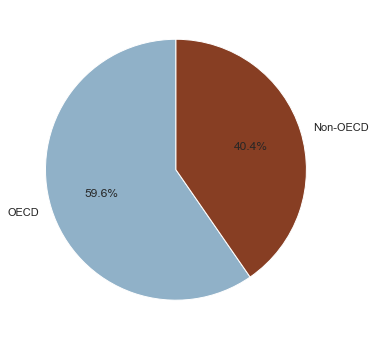

In [146]:
# Distribution of OECD countries
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(df['OECD_country'].value_counts(), colors = colors, labels=['OECD', 'Non-OECD'], autopct='%1.1f%%', startangle=90);

## Gender distribution

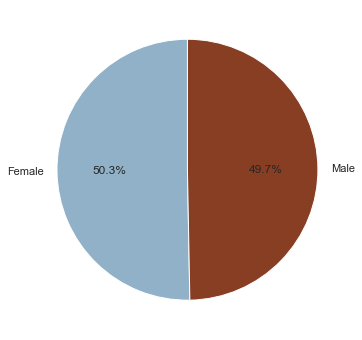

In [140]:
# Distribution of gender
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(df['Gender'].value_counts(), colors = colors, labels=['Female', 'Male'], autopct='%1.1f%%', startangle=90);

## Single Parents

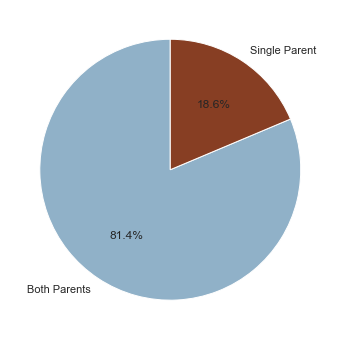

In [151]:
## Single Parents distribution
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(df['Single_parent'].value_counts(), colors = colors, labels=['Both Parents', 'Single Parent'], autopct='%1.1f%%', startangle=90);

## Math, Reading and Science scores distribution

In [37]:
# descriptive statistics for math, reading and science scores 
df.Plausible_value_mathematics.describe(), df.Plausible_value_reading.describe(), df.Plausible_value_science.describe()           

(count    325497.000000
 mean        480.433085
 std         102.667809
 min          71.124800
 25%         406.535300
 50%         477.652300
 75%         551.885000
 max         962.229300
 Name: Plausible_value_mathematics, dtype: float64,
 count    325497.000000
 mean        481.557202
 std         100.285503
 min           0.083400
 25%         413.918900
 50%         484.692000
 75%         552.762500
 max         904.802600
 Name: Plausible_value_reading, dtype: float64,
 count    325497.00000
 mean        485.68416
 std         100.14623
 min           6.84450
 25%         414.80790
 50%         485.67700
 75%         557.29210
 max         903.33830
 Name: Plausible_value_science, dtype: float64)

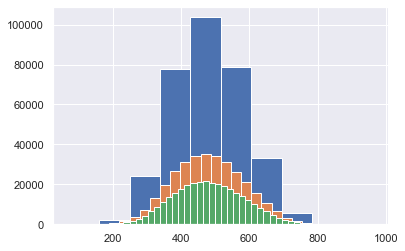

In [38]:
# Histogram for distribution of math, reading and science scores -  deciding on appropriate binning
plt.hist(data = df, x = 'Plausible_value_mathematics', bins = 10);
plt.hist(data = df, x = 'Plausible_value_mathematics', bins = 30);
plt.hist(data = df, x = 'Plausible_value_mathematics', bins = 50);

*After exploring what bin size is the most appropriate I chose binsize = 30.*

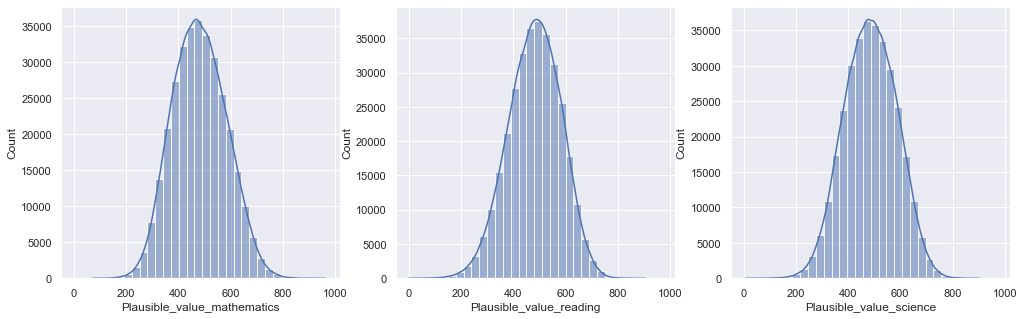

In [39]:
fig, axs = plt.subplots(ncols=3, figsize=(17, 5), sharex=True) 
sns.histplot(df.Plausible_value_mathematics, kde=True, binwidth=30, ax=axs[0]);
sns.histplot(df.Plausible_value_reading, kde=True, binwidth=30, ax=axs[1]);
sns.histplot(df.Plausible_value_science, kde=True, binwidth=30, ax=axs[2]);

*Math, Reading and Science scores are normaly distributed.*

### Educational status of the parents

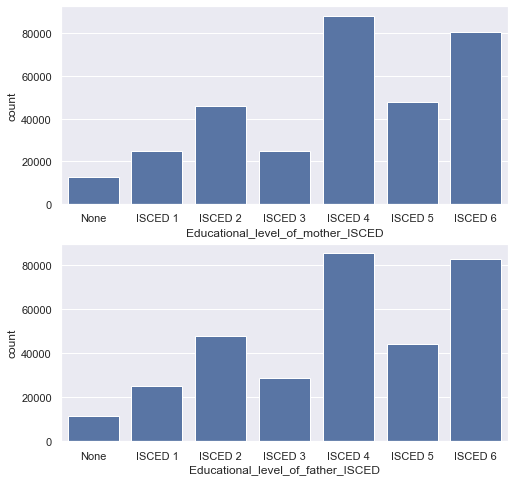

In [174]:
# let's plot all three together to get an idea of each ordinal variable's distribution.
fig, ax = plt.subplots(nrows=2, figsize = [8,8])

default_color = sns.color_palette()[0]
sns.countplot(data = df, x = 'Educational_level_of_mother_ISCED', color = default_color, ax = ax[0])
sns.countplot(data = df, x = 'Educational_level_of_father_ISCED', color = default_color, ax = ax[1])

plt.show()

From the chart above we can see that both parents have similar education level. Most parents have level 4 or level 6 educational levet, while small portion have no education level completed.

### Wealth and home possesions

Explanation of the variables - from the codebook!! Cultural_Possessions
Home_educational_resources
Home_Possessions
Wealth

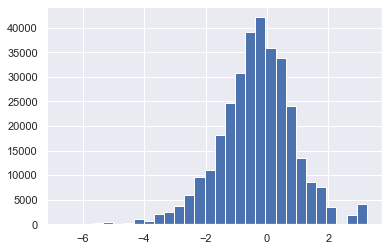

In [177]:
# Histogram for distribution of Wealth
plt.hist(data = df, x = 'Wealth', bins = 30);

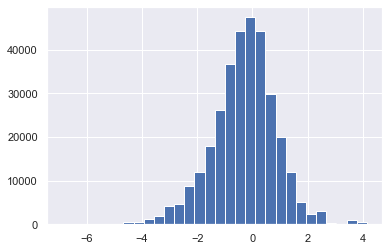

In [178]:
# Histogram for Home_Possessions = summary index
plt.hist(data = df, x = 'Home_Possessions', bins = 30);

*Some of the values seems a bit extreme - see the tails -  investigate further with boxplots!!!*

## Cultular possesions and Home educational resources

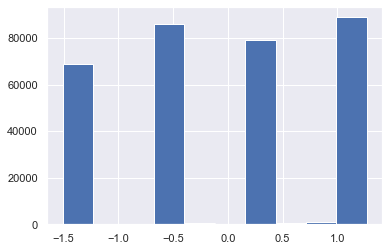

In [42]:
# Histogram for Cultural_Possessions: lesson 3 lecture 11 - choosing plot for discrete 
plt.hist(data = df, x = 'Cultural_Possessions', bins = 10);

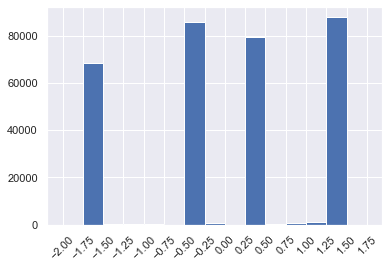

In [43]:
# Create bins with step-size 5
bins = np.arange(-2.0, df['Cultural_Possessions'].max()+0.5, 0.25)
plt.hist(data = df, x = 'Cultural_Possessions', bins = bins);
plt.xticks(np.arange(-2, 2, 0.25), rotation = 45);

In [44]:
df.Cultural_Possessions.value_counts()

 1.27    87864
-0.48    86074
 0.25    78963
-1.51    68521
 0.48      668
 1.01      579
 1.11      437
 0.97      393
-0.15      356
 0.78      332
 0.72      272
-1.17      272
-0.18      205
-0.03      190
-1.31      177
-1.33       89
-0.83       43
-1.08       40
-0.78       22
Name: Cultural_Possessions, dtype: int64

In [45]:
df.Cultural_Possessions.describe()

count    325497.000000
mean         -0.037138
std           0.999548
min          -1.510000
25%          -0.480000
50%           0.250000
75%           1.270000
max           1.270000
Name: Cultural_Possessions, dtype: float64

***Use cut function here and explain why and how!!***

In [79]:
bin_names = ['Low', 'Medium', 'High']
bin_edges = [-1.51, -0.48, 0.25, 1.27]
df['Cultural_Possessions_bin'] = pd.cut(df['Cultural_Possessions'], bin_edges, labels=bin_names)

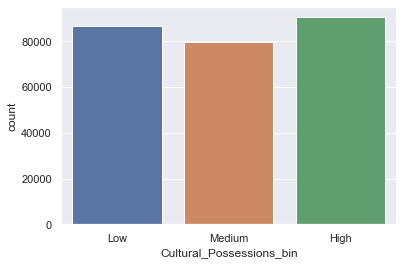

In [80]:
sns.countplot(data=df, x='Cultural_Possessions_bin');

(array([1.0930e+03, 1.0000e+01, 3.6280e+03, 9.8480e+03, 2.0763e+04,
        3.9477e+04, 6.6038e+04, 8.6051e+04, 2.2300e+02, 9.8366e+04]),
 array([-3.93 , -3.425, -2.92 , -2.415, -1.91 , -1.405, -0.9  , -0.395,
         0.11 ,  0.615,  1.12 ]),
 <BarContainer object of 10 artists>)

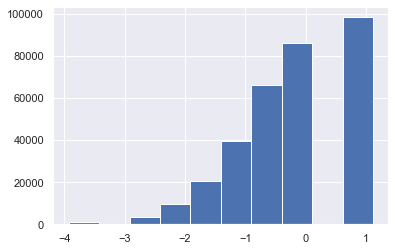

In [51]:
# Histogram for Home_educational_resources 
plt.hist(data = df, x = 'Home_educational_resources', bins = 10)

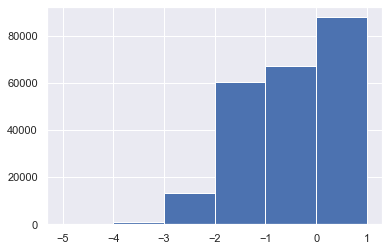

In [76]:
bins = np.arange(-5, df['Home_educational_resources'].max()+0.05, 1)
plt.hist(data = df, x = 'Home_educational_resources', bins = bins);
plt.xticks(np.arange(-5, 2, 1));

## Skip whole day or classes within school days

Truancy_Skip_whole_school_day         
Truancy_Skip_classes_within_school_day 

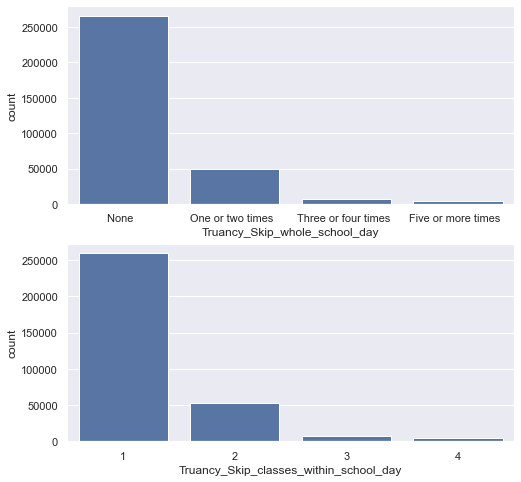

In [57]:
# let's plot all three together to get an idea of each ordinal variable's distribution.
fig, ax = plt.subplots(nrows=2, figsize = [8,8])
default_color = sns.color_palette()[0]
sns.countplot(data = df, x = 'Truancy_Skip_whole_school_day', color = default_color, ax = ax[0])
sns.countplot(data = df, x = 'Truancy_Skip_classes_within_school_day', color = default_color, ax = ax[1]
plt.show()

In [180]:
df_short.ST115Q01.value_counts()

1    378576
2     81343
3     12216
4      7134
Name: ST115Q01, dtype: int64

Here write about investigation of dropping null values!! investigate before dropping null values
check with original data = OK

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

Write here about cultural and home possesions.. get info from the codebook. also about categorical variables and skip classes within school days.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

<a id='bivariate'></a>
## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### scatter plot - between two quantitative variables
- between math, science and reading scores
- between wealth and home possesion
- reading and cultuar possesion

In [84]:
numeric_vars = ['Plausible_value_mathematics', 'Plausible_value_reading', 'Plausible_value_science', 'Home_educational_resources', 'Home_Possessions', 'Wealth', 'Cultural_Possessions']
categoric_vars = ['Educational_level_of_father_ISCED', 'Educational_level_of_mother_ISCED', 'OECD_country']

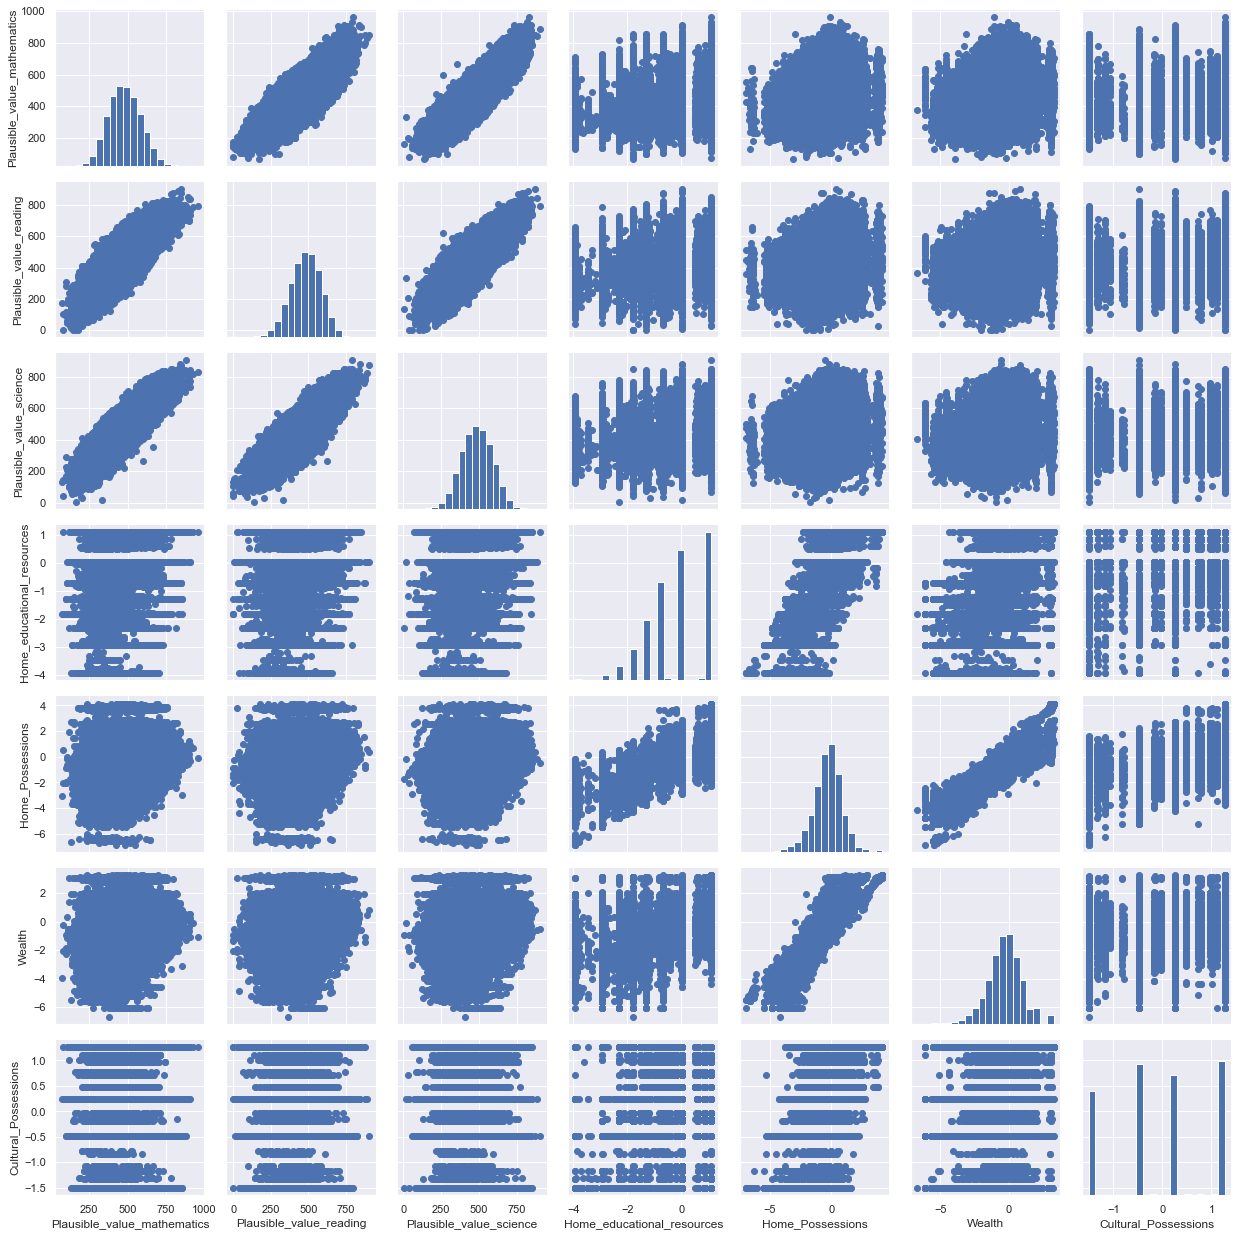

In [91]:
g = sns.PairGrid(data = df, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

Text(0, 0.5, 'Wealth')

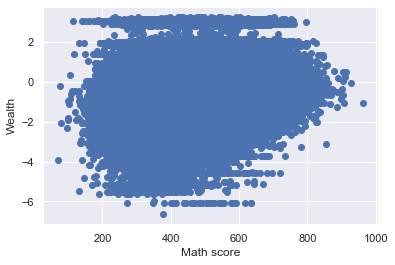

In [82]:
# Scatter plot between scores and whealth and home possesions 
plt.scatter(data = df, x = 'Plausible_value_mathematics', y = 'Wealth');
plt.xlabel('Math score')
plt.ylabel('Wealth')

Text(0, 0.5, 'Science score')

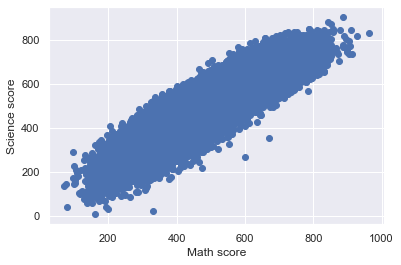

In [83]:
plt.scatter(data = df, x = 'Plausible_value_mathematics', y = 'Plausible_value_science');
plt.xlabel('Math score')
plt.ylabel('Science score')

## Correlation plot

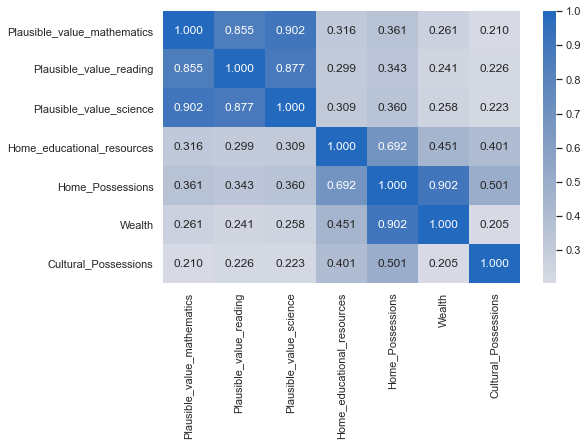

In [89]:
# correlation plot
plt.figure(figsize = [8, 5])
sns.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

## Violin plots for For quantitative vs qualitative variables


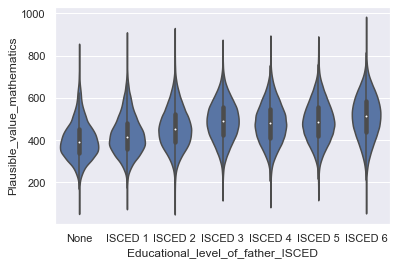

In [95]:
# violin plots
base_color = sns.color_palette()[0]
sns.violinplot(data=df, x='Educational_level_of_father_ISCED', y='Plausible_value_mathematics', color=base_color);

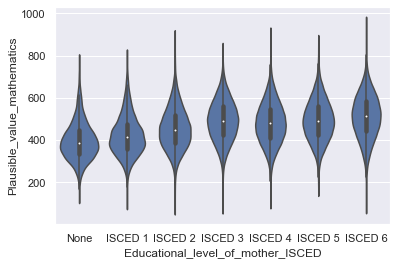

In [96]:
# violin plots
base_color = sns.color_palette()[0]
sns.violinplot(data=df, x='Educational_level_of_mother_ISCED', y='Plausible_value_mathematics', color=base_color);

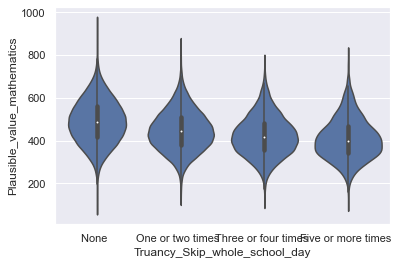

In [99]:
# violin plots
base_color = sns.color_palette()[0]
sns.violinplot(data=df, x='Truancy_Skip_whole_school_day', y='Plausible_value_mathematics', color=base_color);

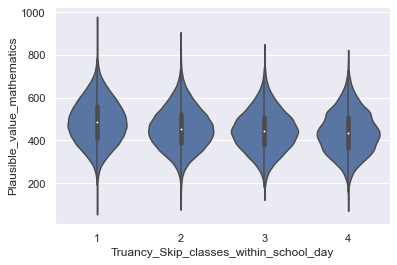

In [100]:
# violin plots
base_color = sns.color_palette()[0]
sns.violinplot(data=df, x='Truancy_Skip_classes_within_school_day', y='Plausible_value_mathematics', color=base_color);

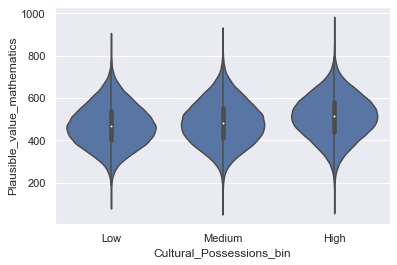

In [101]:
# violin plots
base_color = sns.color_palette()[0]
sns.violinplot(data=df, x='Cultural_Possessions_bin', y='Plausible_value_mathematics', color=base_color);

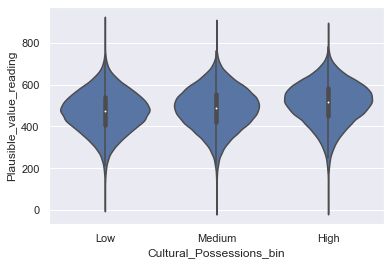

In [102]:
# violin plots
base_color = sns.color_palette()[0]
sns.violinplot(data=df, x='Cultural_Possessions_bin', y='Plausible_value_reading', color=base_color);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

<a id='multivariate'></a>
## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

## Heat maps

In [ ]:
OECD_country
Plausible_value_mathematics
Cultural_Possessions_bin

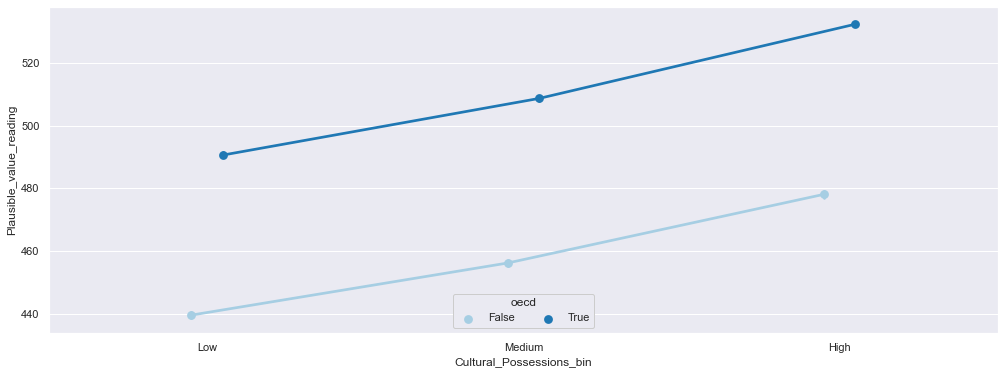

In [109]:
plt.figure(figsize = [17, 6])

#ax = sb.barplot(data = pisa_clean[pisa_clean['Study Time With Parent'] > 5], x = 'Study Time With Parent', y = 'Overall Score', hue = 'Parents Presence')
ax = sns.pointplot(data = df, 
                  x = 'Cultural_Possessions_bin', y = 'Plausible_value_reading', hue = 'OECD_country',
                  dodge = 0.1, palette = sns.color_palette('Paired')
                 )
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'OECD Country');

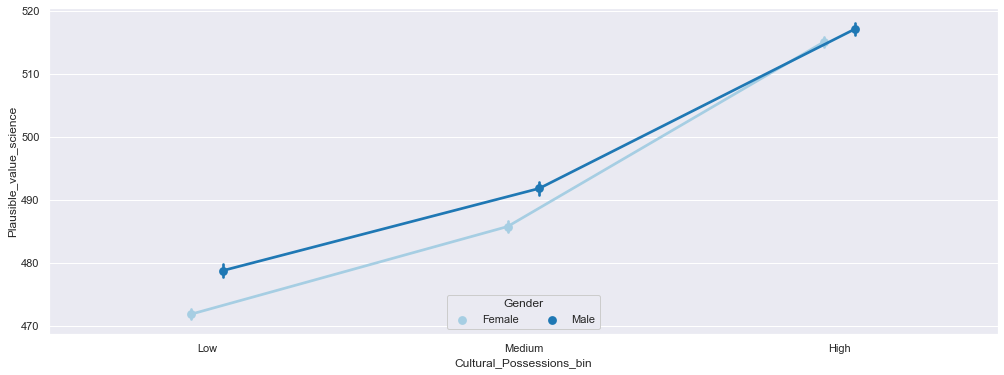

In [112]:
plt.figure(figsize = [17, 6])

#ax = sb.barplot(data = pisa_clean[pisa_clean['Study Time With Parent'] > 5], x = 'Study Time With Parent', y = 'Overall Score', hue = 'Parents Presence')
ax = sns.pointplot(data = df, 
                  x = 'Cultural_Possessions_bin', y = 'Plausible_value_science', hue = 'Gender',
                  dodge = 0.1, palette = sns.color_palette('Paired')
                 )
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Gender');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

<a id='conclusion'></a>
## Conclusion